# Third Analysis : (Using feature selection )
# Part 1 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv("c:/users/HP/Dropbox/Breast Cancer ML Project/breast-cancer-wisconsin-data/data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )


Shape of the data :  (569, 33)


# Preprocessing 

In [3]:
y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
cancer_df.head(3) 
feature_names = cancer_df.columns  # a list to store the feature names 
X = cancer_df.values 

In [4]:
from sklearn.preprocessing import StandardScaler 

In [5]:
# we need to have unit mean and zero variance/ step deviation 

scaler = StandardScaler()
scaler.fit(X )
scaled_x = scaler.transform(X) 


<p style = "color :red ; font-family : monospace ; font-size :25px " > feature selection </p>

# Univariate Elimination

In [6]:
from sklearn.feature_selection import SelectKBest , f_classif 
test = SelectKBest(score_func= f_classif , k= 25 )
fit = test.fit(scaled_x , y ) 
new_x = fit.transform(scaled_x ) # new_x is the new input data 

scores = test.scores_   # Stores the score of each feature 

In [7]:
# Let's see the score of each feature 
score_df = pd.DataFrame({"feature name" : feature_names , "Score" : scores})
score_df.sort_values( by = "Score" , inplace = True , ascending = False )
score_df 
# First 25 features have been selected , last 5 features have been discarded 
# last 5 features have really less score 

,feature name,Score
27,concave points_worst,964.385393
22,perimeter_worst,897.944219
7,concave points_mean,861.676020
20,radius_worst,860.781707
2,perimeter_mean,697.235272
23,area_worst,661.600206
0,radius_mean,646.981021
3,area_mean,573.060747
6,concavity_mean,533.793126
26,concavity_worst,436.691939


In [8]:
from sklearn.model_selection import cross_val_predict 

# Logistic Regression 

In [9]:
accuracy = []    # a list to store the accuracy score 

In [10]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver = "liblinear")


In [11]:
y_pred = cross_val_predict(log_model , new_x , y , cv = 10 )

# Evaluation metrics

In [12]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score 

In [13]:
accuracy_log = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracy.append(accuracy_log)
confusion_matrix_log = confusion_matrix(y , y_pred )  
precision_score_log = round(precision_score(y , y_pred , average= 'weighted') * 100 ,2 ) 
recall_score_log = round(recall_score(y , y_pred,  average= 'weighted') * 100 , 2 )
f1_score_log =  round(f1_score(y , y_pred , average = 'weighted')  * 100  , 2 ) 

In [14]:
print("Confusion matrix : " , confusion_matrix_log , sep = '\n' , end = '\n\n') 
print("Accuracy score : " , accuracy_log )
print("Precision score : " , precision_score_log ) 
print("Recall score : " ,  recall_score_log ) 
print("f1 score : " , f1_score_log  )

Confusion matrix : 
[[354   3]
 [  8 204]]

Accuracy score :  98.07
Precision score :  98.07
Recall score :  98.07
f1 score :  98.06


In [15]:
accuracy

[98.07]

<p style="color : green ; font-size :20px ; font-family : verdana; "> Logistic Regression gives an accuracy of 
<b>98.07 </b> </p>

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier 

In [17]:
depths = [i for i in range(3, 10 )]
for depth in depths :
    tree = DecisionTreeClassifier(criterion= "entropy" , max_depth= depth , random_state= 3 ) 
    y_pred = cross_val_predict(tree , new_x , y , cv = 10 ) 
    print ("----  Depth : ---- " , depth ) 
    print("Accuracy Score : " , round(accuracy_score(y , y_pred ) * 100 , 2 )  )
    print("precision score : " , round(precision_score(y , y_pred , average ='weighted') * 100 , 2 ) )
    print("Recall score : " , round( recall_score(y , y_pred , average = 'weighted') * 100  , 2 ) )
    print("f1 score : " , round(f1_score(y , y_pred , average = "weighted") * 100  , 2 )) 

----  Depth : ----  3
Accuracy Score :  93.85
precision score :  93.84
Recall score :  93.85
f1 score :  93.85
----  Depth : ----  4
Accuracy Score :  93.85
precision score :  93.84
Recall score :  93.85
f1 score :  93.83
----  Depth : ----  5
Accuracy Score :  94.02
precision score :  94.02
Recall score :  94.02
f1 score :  94.02
----  Depth : ----  6
Accuracy Score :  92.79
precision score :  92.82
Recall score :  92.79
f1 score :  92.8
----  Depth : ----  7
Accuracy Score :  93.15
precision score :  93.22
Recall score :  93.15
f1 score :  93.17
----  Depth : ----  8
Accuracy Score :  93.15
precision score :  93.22
Recall score :  93.15
f1 score :  93.17
----  Depth : ----  9
Accuracy Score :  93.15
precision score :  93.22
Recall score :  93.15
f1 score :  93.17


<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for depth = 5 , we are getting a max accuracy of <b>94.02</b> </p>

In [18]:
accuracy.append(94.02) 

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier 

In [20]:
for k in range(2, 15 ) :
    knn_model = KNeighborsClassifier(n_neighbors= k ) 
    y_pred  = cross_val_predict(knn_model , new_x , y , cv = 10 )
    print("---  k value : --- "  , k )    
    print("Accuracy Score : " , round(accuracy_score(y , y_pred ) * 100 , 2 )  )
    print("precision score : " , round(precision_score(y , y_pred , average ='weighted') * 100 , 2 ) )
    print("Recall score : " , round( recall_score(y , y_pred , average = 'weighted') * 100  , 2 ) )
    print("f1 score : " , round(f1_score(y , y_pred , average = "weighted") * 100  , 2 ) ,end = '\n\n')     
            

---  k value : ---  2
Accuracy Score :  95.78
precision score :  96.0
Recall score :  95.78
f1 score :  95.73

---  k value : ---  3
Accuracy Score :  96.49
precision score :  96.5
Recall score :  96.49
f1 score :  96.47

---  k value : ---  4
Accuracy Score :  96.49
precision score :  96.59
Recall score :  96.49
f1 score :  96.45

---  k value : ---  5
Accuracy Score :  97.19
precision score :  97.22
Recall score :  97.19
f1 score :  97.17

---  k value : ---  6
Accuracy Score :  96.49
precision score :  96.56
Recall score :  96.49
f1 score :  96.46

---  k value : ---  7
Accuracy Score :  96.49
precision score :  96.53
Recall score :  96.49
f1 score :  96.46

---  k value : ---  8
Accuracy Score :  96.13
precision score :  96.23
Recall score :  96.13
f1 score :  96.1

---  k value : ---  9
Accuracy Score :  96.66
precision score :  96.7
Recall score :  96.66
f1 score :  96.64

---  k value : ---  10
Accuracy Score :  95.96
precision score :  96.04
Recall score :  95.96
f1 score :  95

<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for k = 5 , we are getting a max accuracy of <b>97.19</b> </p>

In [21]:
accuracy.append(97.19)

# visualization 

In [22]:
test = ["log_reg" , "Dec_tree" , "KNN"]
cv_accuracy = [98.24 , 93.85 , 96.84 ]

In [23]:
test_df = pd.DataFrame({"Test" : test , "Using Feature selection" : accuracy , "No feature selection(only cv)" : cv_accuracy})
test_df

,Test,Using Feature selection,No feature selection(only cv)
0,log_reg,98.07,98.24
1,Dec_tree,94.02,93.85
2,KNN,97.19,96.84


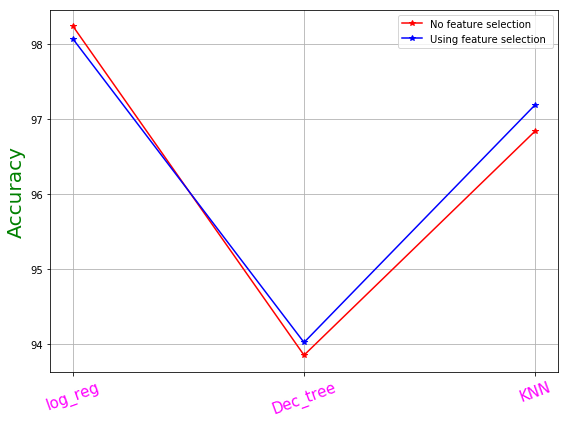

In [24]:
plt.figure(figsize = (8, 6))
plt.plot(test, cv_accuracy , color = "red" , marker = "*" , label = "No feature selection")
plt.plot(test , accuracy , color = "blue" , marker = "*" , label = "Using feature selection ")
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.xticks(color = "magenta" , fontsize = 15 , rotation = 20 )
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("third_ana1.png")
plt.show()

# Part 2 
# SVM classifier 

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [26]:
kernels = ["linear" , "poly", "rbf" , "sigmoid"] 
C = [1 , 10 ,100 , 1000 ]
gamma = [1 , 0.1 , 0.01 , 0.001 ]
kernel_accuracy = [] 
kernel_f1_score = []
kernel_precision_score = [] 
kernel_recall_score = [] 

In [27]:
for kernel in kernels :
    grid = GridSearchCV(estimator = SVC() , param_grid= {"C" : C , "gamma" : gamma , "kernel" : [kernel]}) 
    y_pred = cross_val_predict(grid , new_x , y , cv = 10 )
    
    kernel_accuracy.append(round(accuracy_score(y , y_pred) * 100  , 2 ))
    kernel_precision_score.append( round(precision_score(y , y_pred , average ='weighted') * 100 , 2 ))
    kernel_recall_score.append( round(recall_score(y , y_pred , average ='weighted') * 100 , 2 ))
    kernel_f1_score.append( round(f1_score(y , y_pred , average ='weighted') * 100 , 2 ))
        


In [28]:
pd.DataFrame({"Kernels" : kernels , "Accuracy score" : kernel_accuracy , "Precision_score" : kernel_precision_score , 
             "Recall score" : kernel_recall_score , "f1 score" : kernel_f1_score })

,Kernels,Accuracy score,Precision_score,Recall score,f1 score
0,linear,97.36,97.36,97.36,97.36
1,poly,95.78,95.78,95.78,95.77
2,rbf,98.07,98.07,98.07,98.06
3,sigmoid,97.19,97.19,97.19,97.18


In [29]:
cv_kernel_accuracy = [97.36 ,96.31 ,97.19 ,97.72 ]

# visualization

In [30]:
kernel_df = pd.DataFrame({"Kernels" : kernels ,"Using Feature Selection " : kernel_accuracy , "No Feature selection" : cv_kernel_accuracy })
kernel_df 

,Kernels,Using Feature Selection,No Feature selection
0,linear,97.36,97.36
1,poly,95.78,96.31
2,rbf,98.07,97.19
3,sigmoid,97.19,97.72


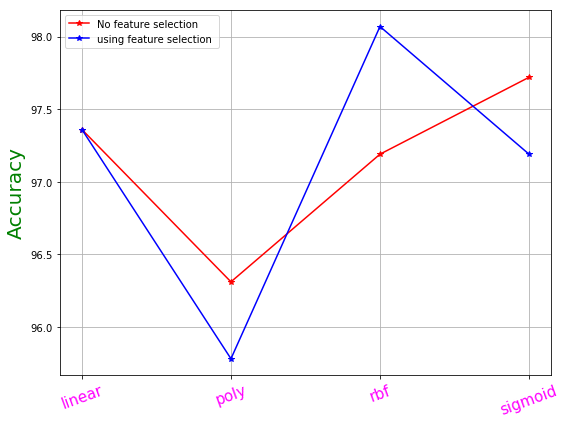

In [31]:
plt.figure(figsize = (8 , 6 ))
plt.plot(kernels , cv_kernel_accuracy , color = "red" , marker = "*" , label = "No feature selection")
plt.plot(kernels , kernel_accuracy , color = "blue" , marker = "*" , label = "using feature selection ")
plt.legend() 
plt.grid(True)
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.xticks(color = "magenta" , fontsize = 15 , rotation = 20 )
plt.tight_layout()
plt.savefig("third_ana2.png")
plt.show()

# end of Third analysis